# Reddit Headlines and Stock Market Performance

## Load and Clean Data

In [1]:
#
import pandas as pd

#com_news_df = pd.read_csv("C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/Combined_News_DJIA.csv")
com_news_df = pd.read_csv('data/Combined_News_DJIA.csv')
com_news_df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
# look at the top1 headlines
com_news_df.shape

(1989, 27)

In [2]:
#DJIA_data = pd.read_csv('C:/Users/Yonas/OneDrive/Desktop/IMT 575/Group Project/Files/upload_DJIA_table.csv')
DJIA_data = pd.read_csv('data/upload_DJIA_table.csv')

DJIA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [8]:
print(com_news_df.shape, DJIA_data.shape )

(1989, 27) (1989, 7)


Merge the Dow Jones and the top news from reddit together. Also create a copy of the DF in order to use for sentiment later

In [4]:
merged_data = com_news_df.merge(DJIA_data, how = 'inner', on = 'Date', left_index = True)

merged_data_sent = merged_data.copy()

In [128]:
merged_data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


Merge all 25 top headlines together

In [5]:
# to combine the first 5 coulums of the top news in
top25_headlines = []

for row in range(0, len(merged_data.index)):
    top25_headlines.append(' '.join( str(x) for x in merged_data.iloc[row, 2:27]))
    
    
# merged_data[:28,'top5_headlines'] = top5_headlines
# merged_data.head

In [6]:
merged_data.insert(2, "top25_headlines", top25_headlines, True)
merged_data.head()

# 

,Date,Label,top25_headlines,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...","b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [132]:
# merged_data.insert(26, "top25_headlines", top25_headlines, True)
# merged_data

Optionally delete other extra columns of data [2:27]]


In [13]:

#merged_data.drop(merged_data.iloc[:, 3:28], inplace = True, axis = 1)
#merged_data

,Date,Label,top25_headlines,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0,Barclays and RBS shares suspended from trading...,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


Sort the columns by Date

In [14]:
merged_data = merged_data.sort_values(by="Date")
merged_data

,Date,Label,top25_headlines,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,b'Why wont America and Nato help us? If they w...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,b'All the experts admit that we should legalis...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...,...,...
4,2016-06-27,0,Barclays and RBS shares suspended from trading...,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...",17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,1,Explosion At Airport In Istanbul Yemeni former...,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


# Preprocessing the codes.

Use regex to remove stopwords and to lemmatize all of the top 25 headlines

In [15]:
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def prepro_text(target_text):
    # if b'/b"
    target_text = re.sub(r"^b[\'\"]", '', target_text)
    target_text = re.sub(r"[^\w\s]", '', target_text)
    target_text = target_text.lower().strip()
    target_text = target_text.split()
    target_text = ' '.join([x for x in target_text if x not in stopwords.words('english')])
    return target_text

In [16]:
# applymap to the whole dataframe



merged_data.iloc[:,2] = merged_data.iloc[:,2:].applymap(lambda element:prepro_text(str(element)))
merged_data.head()

# restart and run the following code only once!
# com_news_df.to_csv('cleaned_Combined_News_DJIA.csv')

,Date,Label,top25_headlines,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,georgia downs two russian warplanes countries ...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,wont america nato help us wont help us help ir...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,remember adorable 9yearold sang opening ceremo...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,us refuses israel weapons attack iran report b...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,experts admit legalise drugs bwar south osetia...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


# Filter the dataset for stock related keywords

Filter for stock related keywords. 

Used the column with the top 25 headlines to get the new dataframe with stock keywords only. 

The new dataframe has 553 rows.

In [7]:
stock_related_keywords = "stock|market|feds|bond|bonds|stocks|bull|bear"

import numpy as np

temp_df = merged_data.copy()

merged_data_keywords = temp_df[['top25_headlines', 'Label']]

merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)

mask = np.column_stack([merged_data_keywords[col].str.contains(stock_related_keywords, na=False) for col in merged_data_keywords])
stock_keyword = merged_data_keywords.loc[mask.any(axis=1)]

stock_keyword['Label'] = stock_keyword['Label'].astype(int)
 
stock_keyword

#backup code

# for keyword in merged_data_keywords['top25_headlines']:
#     if keyword.contains('Georgia'):
#         print('this is georgia')
    
#mask = np.column_stack([merged_data_keywords[col].str.contains(r"stock|market|feds|bond|stocks|bull|bear", na=False) for col in merged_data_keywords])
#mask = np.column_stack([df[col].str.contains(r"\^", na=False) for col in df])
#df.loc[mask.any(axis=1)]

<ipython-input-7-f45cd3e3d418>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_keywords['Label'] = merged_data_keywords['Label'].astype(str)
<ipython-input-7-f45cd3e3d418>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_keyword['Label'] = stock_keyword['Label'].astype(int)


,top25_headlines,Label
1977,"b""N Korea's Kim died in 2003; replaced by look...",0
1973,b'Russian Prime Minister Vladimir Putin has ac...,0
1969,"b'In Jordan, the honor killings that are not: ...",1
1961,b'Attack on US embassy in Yemen leaves 16 dead...,0
1959,b'Brits take a stand - ban short-selling of fi...,1
...,...,...
11,Decriminalisation Call As 'War On Drugs' Fails...,1
9,A staggering 87 percent of Venezuelans say the...,1
5,David Cameron to Resign as PM After EU Referen...,0
4,Barclays and RBS shares suspended from trading...,0


Import train test split. Use the top 25 headlines combined together as the X variable. 

The Y variable is the Label which shows whether or not the stock market went up or down

In [8]:
from sklearn.model_selection import train_test_split

X = merged_data['top25_headlines']
y = merged_data.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)

Import the count vectorizer

In [24]:
# only run once for the following code!

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sentence_transformers import SentenceTransformer
#sentBert = SentenceTransformer('paraphrase-distilroberta-base-v1')
from tqdm.auto import tqdm
from sklearn.preprocessing import MaxAbsScaler
# Universal Sentence Encoder
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

#this part doesn't work for Josh
use = hub.load(module_url)
print("module %s loaded" % module_url)
import numpy as np

OSError: SavedModel file does not exist at: C:\Users\Josh\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c/{saved_model.pbtxt|saved_model.pb}

Import tensorflow 

In [25]:
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use = hub.load(module_url)
print("module %s loaded" % module_url)



OSError: SavedModel file does not exist at: C:\Users\Josh\AppData\Local\Temp\tfhub_modules\063d866c06683311b44b4992fd46003be952409c/{saved_model.pbtxt|saved_model.pb}

Import the Tfidf vectorizer. 

Create a function to run the model with either TFIDF or bert

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
# return the vectors
def text_vector(target_method='tfidf', \
                target_list_train=X_train.to_list(),\
                target_list_test = X_test.to_list(),\
                max_features=None):
    """
    type: target_method: string - ("tfidf", "bert", "embedding")
    rtype: list of vectors
    """
    
    
#     if target_method == "bert":
#         sentBert_x_train = []
#         sentBert_x_test = []
        
#         for i in tqdm(range(len(target_list_train))):
#             emb = sentBert.encode(target_list_train[i])
#             sentBert_x_train.append(emb)
#         sentBert_x_train = np.asarray(sentBert_x_train)

#         for i in tqdm(range(len(target_list_test))):
#             emb = sentBert.encode(target_list_test[i])
#             sentBert_x_test.append(emb)
#         sentBert_x_test = np.asarray(sentBert_x_test)
        
#         sentBert_scaler = MaxAbsScaler()
#         sentBert_x_train = sentBert_scaler.fit_transform(sentBert_x_train)
#         sentBert_x_test = sentBert_scaler.transform(sentBert_x_test)
#         return sentBert_x_train, sentBert_x_test

    if target_method == "embedding":
        use_x_train = []
        use_x_test = []
        use_x_train = use(target_list_train)
        use_x_test = use(target_list_test)
        return use_x_train, use_x_test
    
    if target_method == "tfidf":
        vectorizer = TfidfVectorizer(max_features=max_features)
        tfidf_train = vectorizer.fit_transform(target_list_train)
        tfidf_test = vectorizer.transform(target_list_test)
        tfidf_scaler = MaxAbsScaler()
        tfidf_x_train = tfidf_scaler.fit_transform(tfidf_train)
        tfidf_x_test = tfidf_scaler.transform(tfidf_test)
        return tfidf_x_train, tfidf_x_test

# tfidf, 
print(type(text_vector()[0].toarray()))
print(len(text_vector()[0].toarray()[0]))

print(type(text_vector()[1].toarray()))
print(len(text_vector()[1].toarray()[0]))

print(text_vector()[1])
;

<class 'numpy.ndarray'>
38704
<class 'numpy.ndarray'>
38704
  (0, 38515)	0.304591337858147
  (0, 38435)	0.170306590472444
  (0, 38426)	0.4056132205832031
  (0, 38378)	0.43584423976975717
  (0, 38203)	0.5029388576268801
  (0, 38190)	0.2559496485057992
  (0, 38125)	0.26534318899774206
  (0, 38032)	0.3548902215012629
  (0, 38006)	0.581889145522742
  (0, 37958)	0.07931572876737115
  (0, 37800)	0.34123441784168834
  (0, 37745)	0.32833949707876187
  (0, 37608)	0.919278702222707
  (0, 37527)	0.9331512936498809
  (0, 37388)	0.45491184213016617
  (0, 37328)	0.46104272830534354
  (0, 37280)	0.8892599755874588
  (0, 37227)	0.5032270215478718
  (0, 37199)	0.473929757489046
  (0, 37097)	0.756277130551054
  (0, 36847)	0.30087132253127785
  (0, 36781)	0.07608426306000218
  (0, 36772)	0.9267589863348136
  (0, 36500)	0.34014403397143017
  (0, 36489)	0.3454749344606432
  :	:
  (397, 3886)	0.9342034069170022
  (397, 3872)	0.4942389469646338
  (397, 3781)	0.5169272633279686
  (397, 3772)	0.303054261259175

''

Print out the shape of the vectors after the model is run

In [184]:
# sentBert
ans = text_vector(target_method='bert')

print(ans[0])
print(type(ans[0]))
print(len(ans[0][0]))

print(ans[1])
print(type(ans[1]))
print(len(ans[1][0]))

TypeError: 'NoneType' object is not subscriptable

In [27]:
# tensorflow
ans = text_vector(target_method='embedding')

print(ans[0])
print(type(ans[0]))
print(len(ans[0][0]))

print(ans[1])
print(type(ans[1]))
print(len(ans[1][0]))

NameError: name 'use' is not defined

Write function to get the sentiment using vader and textblob.

In [9]:
#uses textblob to get the sentiment scores of the column 
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()

def text_sent(target_method, target_list_text):
    """
    
    rtype: list of entiment scores
    """
    if target_method == 'blob':
        blob_list = []
        for title in target_list_text:
            blob = TextBlob(title)
            blob_list.append(blob.sentiment.polarity)
    
        return blob_list
    
    if target_method == 'NLTK':
        NLTK_list = []

        for title in target_list_text:
            sia_polarity = sia.polarity_scores(title)
            NLTK_list.append(sia_polarity['compound'])
        return NLTK_list

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Josh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Get the average sentiment

In [10]:
#For some reason can't get the sentiment for the last 3 columns

# Average sentiment for column by blob

column_list_blob = []

for i in range(1,22):
    i_str = str(i)
    Topic = ('Top'+i_str)
    Topic_sent_blob = (Topic + '_sent_' 'blob')
    topic_list = text_sent("blob",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_blob] = topic_list
    column_list_blob.append(Topic_sent_blob)


merged_data_sent_sum_blob = merged_data_sent[column_list_blob].sum(axis=1)
merged_data_sent["average_blob_sent"] = merged_data_sent_sum_blob / 22

 
# Average sentiment by column for NLTK   


column_list_nltk = []

for i in range(1,22):
    i_str = str(i)
    Topic = ('Top'+i_str)
    Topic_sent_nltk = (Topic + '_sent_' 'NLTK')
    topic_list = text_sent("NLTK",merged_data_sent[Topic])
    merged_data_sent[Topic_sent_nltk] = topic_list
    column_list_nltk.append(Topic_sent_nltk)

merged_data_sent_sum_nltk = merged_data_sent[column_list_nltk].sum(axis=1)
merged_data_sent["average_nltk_sent"] = merged_data_sent_sum_nltk / 22 
    


Create a DF with just the average blob sent and the average nltk sent. Get the average sent for each day

In [71]:
label_sent_df= merged_data_sent[['average_nltk_sent', 'average_blob_sent', 'Label']]

print('average NLTK sent is' , round(label_sent_df["average_nltk_sent"].mean(),2))
print('average Blob sent is' , round(label_sent_df["average_blob_sent"].mean(),2))
label_sent_df

average NLTK sent is -0.2
average Blob sent is 0.01


,average_nltk_sent,average_blob_sent,Label
1988,-0.290255,-0.048722,0
1987,-0.114414,0.030705,1
1986,-0.288518,-0.041955,0
1985,-0.153573,0.005201,0
1984,-0.130273,0.054723,1
...,...,...,...
4,-0.146218,-0.007135,0
3,-0.032705,0.019527,1
2,-0.244345,0.066065,1
1,-0.214800,0.020274,1


Check if positive sentiment for the day is related to a rise in stock prices. 

Do this for both vader and blob

In [72]:
nltk_correct = []
blob_correct = []


for average_nltk_sent, average_blob_sent, Label in label_sent_df.itertuples(index=False):
    if average_nltk_sent <0:
        if Label == 0:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            nltk_correct.append(1)
        else:
            correct = 0
            nltk_correct.append(0)
            
    if average_blob_sent <0:
        if Label == 0:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)
    else:
    #if average_nltk_sent > 0:
        if Label == 1:
            correct = 1
            blob_correct.append(1)
        else:
            correct = 0
            blob_correct.append(0)

label_sent_df['nltk_correct_score'] = nltk_correct
label_sent_df['blob_correct_score'] = blob_correct

    
label_sent_df 



<ipython-input-72-47767e55fe5a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_correct_score'] = nltk_correct
<ipython-input-72-47767e55fe5a>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['blob_correct_score'] = blob_correct


,average_nltk_sent,average_blob_sent,Label,nltk_correct_score,blob_correct_score
1988,-0.290255,-0.048722,0,1,1
1987,-0.114414,0.030705,1,0,1
1986,-0.288518,-0.041955,0,1,1
1985,-0.153573,0.005201,0,1,0
1984,-0.130273,0.054723,1,0,1
...,...,...,...,...,...
4,-0.146218,-0.007135,0,1,1
3,-0.032705,0.019527,1,0,1
2,-0.244345,0.066065,1,0,1
1,-0.214800,0.020274,1,0,1


In [73]:
import numpy as np

average_blob_sent_pos = []
for x in label_sent_df['average_blob_sent']:
    if x > 0:
        average_blob_sent_pos.append(1)
    else:
        average_blob_sent_pos.append(0)

label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos

average_nltk_sent_pos = []
for x in label_sent_df['average_nltk_sent']:
    if x > 0:
        average_nltk_sent_pos.append(1)
    else:
        average_nltk_sent_pos.append(0)

label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos


label_sent_df['nltk_equals_blob_pos'] = (label_sent_df['average_nltk_sent_pos']==label_sent_df['average_blob_sent_pos']).astype(int)

#df['bin_crnn'] = (df['crnn_pred']==df['manual_raw_value']).astype(int)




label_sent_df



<ipython-input-73-91a3d2695c6e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = average_blob_sent_pos
<ipython-input-73-91a3d2695c6e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_nltk_sent_pos'] = average_nltk_sent_pos
<ipython-input-73-91a3d2695c6e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,average_nltk_sent,average_blob_sent,Label,nltk_correct_score,blob_correct_score,average_blob_sent_pos,average_nltk_sent_pos,nltk_equals_blob_pos
1988,-0.290255,-0.048722,0,1,1,0,0,1
1987,-0.114414,0.030705,1,0,1,1,0,0
1986,-0.288518,-0.041955,0,1,1,0,0,1
1985,-0.153573,0.005201,0,1,0,1,0,0
1984,-0.130273,0.054723,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
4,-0.146218,-0.007135,0,1,1,0,0,1
3,-0.032705,0.019527,1,0,1,1,0,0
2,-0.244345,0.066065,1,0,1,1,0,0
1,-0.214800,0.020274,1,0,1,1,0,0


<ipython-input-74-249ab946d53d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
<ipython-input-74-249ab946d53d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
<ipython-input-74-249ab946d53d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

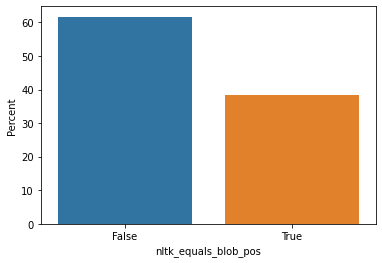

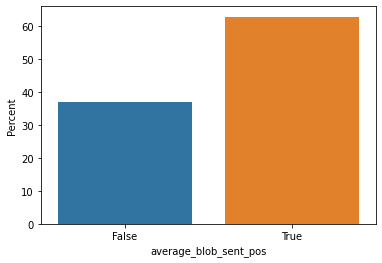

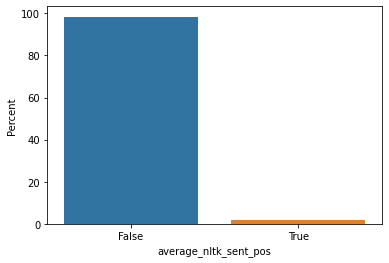

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

label_sent_df['nltk_equals_blob_pos'] = label_sent_df.nltk_equals_blob_pos.astype(bool)
label_sent_df['average_blob_sent_pos'] = label_sent_df.average_blob_sent_pos.astype(bool)
label_sent_df['average_nltk_sent_pos'] = label_sent_df.average_nltk_sent_pos.astype(bool)


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['nltk_equals_blob_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_blob_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()


percentage = lambda i: len(i) / float(len(x)) * 100

x= label_sent_df['average_nltk_sent_pos']
ax = sns.barplot(x=x, y=x,  estimator=percentage)
ax.set(ylabel="Percent")
plt.show()




#backup


#ax = (label_sent_df['average_nltk_sent_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# ax = (label_sent_df['average_blob_sent_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# ax = (label_sent_df['nltk_equals_blob_pos'].value_counts(normalize=True, sort=False)*100).plot.bar()
# ax.set(ylabel="Percent")
# plt.show()

# sns.countplot(data = label_sent_df, x = "average_blob_sent_pos")
# plt.show()
# sns.countplot(data = label_sent_df, x = "average_nltk_sent_pos")
# plt.show()
# sns.countplot(data = label_sent_df, x = "nltk_equals_blob_pos")
# plt.show()



In [69]:
label_sent_df['blob_correct_score'].sum()
label_sent_df['nltk_correct_score'].sum()

925

# Method 1

# Model Selection:

In [289]:
from sklearn.linear_model import LinearRegression
from keras.layers import LSTM
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' DTR ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

In [330]:
# https://dev.to/nitdgplug/stonksmaster-predict-stock-prices-using-python-ml-3hmc

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : -0.012713 (0.011346)
 KNN : -0.202239 (0.075369)
 DTR : -1.046649 (0.144928)
 SVR : -0.507500 (0.108830)


The output of the above code gives us the accuracy estimations for each of our algorithms. We need to compare the models to each other and select the most accurate.

# Logistic Regression Model

Do a simple logistic regression model using sentiment to predict if stocks went up or down

Use text blob and NLTK as the X and the Label of whether stock went down or up as the y

In [55]:


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = merged_data_sent[['average_nltk_sent', 'average_blob_sent']]
y = merged_data_sent['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.48      1.00      0.65       191

    accuracy                           0.48       398
   macro avg       0.24      0.50      0.32       398
weighted avg       0.23      0.48      0.31       398



C:\Users\Josh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

In [58]:
y_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [59]:
print(classification_report(y_test, y_predict))

print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       207
           1       0.52      0.57      0.54       191

    accuracy                           0.54       398
   macro avg       0.54      0.54      0.54       398
weighted avg       0.54      0.54      0.54       398

[[108  99]
 [ 83 108]]


# Result

**Answer** Our questions are:
Are there any relations between news headlines on major social media platforms between the trend of the stock market such as Dow Jones? 
    
<p style="color:green;"> The correlation for both sentiment score are low and it doen't show any relation between 'Top News' & 'Daily Stock Price'. 
 
What type of pattern in the headlines will make the stock market increase than the previous day, and what type of pattern in the headlines will make the stock market decrease than the previous day?
    
<p style="color:green;"> The above corrlation graph doen't show any relationship.
    
    
Does sentiments in the headlines affect our accuracy for classification and predictions?
  
<p style="color:green;"> headline effect
    

# Backup Ignore for now

# Method 2

In [60]:
# chceking the null values in our data
print("checking if any null values are present\n", merged_data.isna().sum())

checking if any null values are present
 Date               0
Label              0
top25_headlines    0
Top1               0
Top2               0
Top3               0
Top4               0
Top5               0
Top6               0
Top7               0
Top8               0
Top9               0
Top10              0
Top11              0
Top12              0
Top13              0
Top14              0
Top15              0
Top16              0
Top17              0
Top18              0
Top19              0
Top20              0
Top21              0
Top22              0
Top23              1
Top24              3
Top25              3
Open               0
High               0
Low                0
Close              0
Volume             0
Adj Close          0
dtype: int64


In [308]:
merged_dataNew = merged_data[['Top25_sent_blob','Top25_sent_NLTK', 'Return']]
merged_dataNew

,Top25_sent_blob,Top25_sent_NLTK,Return
Date,,,
2008-08-08,-0.045117,-0.9970,NaN
2008-08-11,0.070795,-0.9893,0.004093
2008-08-12,-0.006856,-0.9928,-0.011872
2008-08-13,0.006572,-0.9777,-0.009406
2008-08-14,0.015272,-0.9814,0.007194
...,...,...,...
2016-06-27,-0.020016,-0.9733,-0.014971
2016-06-28,0.042701,-0.9462,0.015722
2016-06-29,0.037304,-0.9938,0.016368


In [327]:
merged_dataNew.shape

print("checking null values\n", merged_dataNew.isna().sum())

checking null values
 Top25_sent_blob    0
Top25_sent_NLTK    0
Return             0
dtype: int64


In [318]:
merged_dataNew.shape

(1989, 3)

In [313]:
# replace NaN with 0 permanently
merged_dataNew.fillna(0, inplace=True) 
merged_dataNew

,Top25_sent_blob,Top25_sent_NLTK,Return
Date,,,
2008-08-08,-0.045117,-0.9970,0.000000
2008-08-11,0.070795,-0.9893,0.004093
2008-08-12,-0.006856,-0.9928,-0.011872
2008-08-13,0.006572,-0.9777,-0.009406
2008-08-14,0.015272,-0.9814,0.007194
...,...,...,...
2016-06-27,-0.020016,-0.9733,-0.014971
2016-06-28,0.042701,-0.9462,0.015722
2016-06-29,0.037304,-0.9938,0.016368


In [315]:
#what is the significant number of sentiment score that has predective value on tommorrows daily return 

(1989, 3)

# Test for predictive value
Now we have a cleaned data and the next step is test if there is any realtionship b/n sentiment score and the daily returns. It will help us to answer our question.

<AxesSubplot:xlabel='Top25_sent_NLTK'>

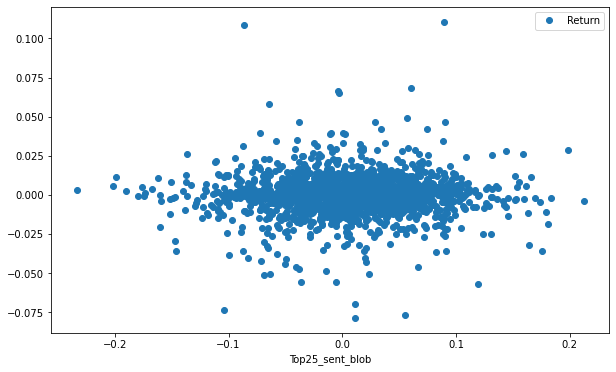

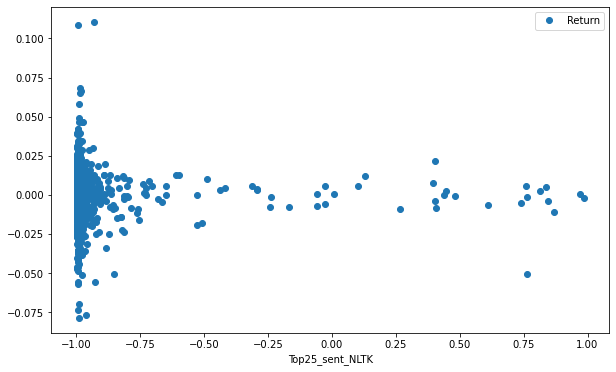

In [321]:
merged_dataNew.plot(x="Top25_sent_blob", y ="Return", style ="o")
merged_dataNew.plot(x="Top25_sent_NLTK", y ="Return", style ="o")

In [324]:
merged_dataNew['Return'].corr(merged_dataNew['Top25_sent_blob'])


0.018291001920415502

In [323]:
merged_dataNew['Return'].corr(merged_dataNew['Top25_sent_NLTK'])

-0.027903328259957318

In [29]:
#print out the sentiment score of the column "Top1" using textblob 

text_sent("blob",merged_data['top25_headlines'])

Top25_sent_blob = text_sent("blob",merged_data['top25_headlines'])

#Add the sentiment of Textblob Top1 to the DF

merged_data['Top25_sent_blob'] = Top25_sent_blob

#print out the sentiment score of the column "Top1" using NLTK


from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

text_sent('NLTK', merged_data['top25_headlines'])

Top25_sent_NLTK = text_sent('NLTK', merged_data['top25_headlines'])

#Add the sentiment of NTLK Top1 to the DF

merged_data['Top25_sent_NLTK'] = Top25_sent_NLTK

merged_data

#To calculate daily returns, we divide today’s prices by yesterday’s.

merged_data['Return'] = merged_data['Adj Close']/merged_data['Adj Close'].shift(1)-1
merged_data


#Do a simple logistic regression model using sentiment to predict if stocks went up or down
#Use text blob and NLTK as the X and the Label of whether stock
#went down or up as the y

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=0)


X = merged_data[['Top25_sent_NLTK','Top25_sent_blob']]
y = merged_data['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                   random_state=1)